# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2024-03-28

## Get started with map-making using open-sources tools

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing the following libraries:

In [1]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm

### Search for a point of interest

You can use the `pyrosm` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the Haskell Indian Nations University campus in Lawrence, KS. The address in here,
`'Haskell Indian Nations University, Lawrence, KS, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down. We are also specifying that we want it to be tagges as a
`'amentity'` type, specifically a `'university'` You might have to try a
couple different searches with different addresses and/or tags to get
the address you want, just like if you are using a map website or app.

In [3]:
# Search for haskell University
haskell_gdf = osm.features_from_address(
    'Haskell Indian Nations University, Lawrence, KS, United States',
    {'amenity': ['university']})
haskell_gdf

,,ways,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,boundary,ele,gnis:feature_id,heritage,...,nrhp:criteria,nrhp:inscription_date,nrhp:nhl,protection_title,ref:nrhp,type,wikidata,wikipedia,nodes,geometry
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
relation,2330930,"[172603550, 174576051, 174576058, 171002778, 1...",Lawrence,2300,66046,Barker Avenue,university,protected_area,268,479134,2,...,(A),"July 4, 1961",yes,protected_site,66000342,multipolygon,Q845332,en:Haskell Indian Nations University,"[[[391518501, 1834666320, 1834666332, 12070968...","POLYGON ((-95.23831 38.93552, -95.23817 38.935..."


<Axes: >

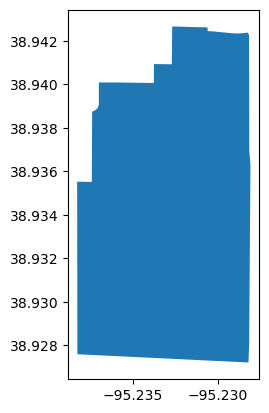

In [4]:
haskell_gdf.plot()

We have a map of the Haskell Campus!

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [8]:
# Plot haskell boundary
haskell_map = haskell_gdf.reset_index().hvplot(
    # Givethe map a descriptive title
    title="Haskell Indian Nations Universty, Lawrence, KS",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=1200, frame_height=1200)

# Save the map as a file to put on the web
hv.save(haskell_map, 'haskell.html')

# Display the map
haskell_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [13]:
import osmnx as ox

# Search for the Chattahoochee-Oconee National Forest
query = "Chattahoochee-Oconee National Forest, Georgia, USA"
forest = ox.geocode_to_gdf(query)
# Search for Chattahoochee-Oconee National Forest
# CHF_gdf = osm.features_from_address(
# 'Chattahoochee-Oconee National Forest, Georgia, USA',
# {'boundary': ['protected_area']})
# CHF_gdf
forest

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-85.12480 34.60127, -85.13318 ...",35.000677,33.013958,-83.098338,-85.367414,319174603,relation,8255270,34.878965,-84.605319,boundary,protected_area,25,0.416207,protected_area,Chattahoochee-Oconee National Forest,"Chattahoochee-Oconee National Forest, Georgia,..."


In [19]:
# Search for Atlanta, Ga
atl_gdf = osm.features_from_address(
  'Atlanta, Georgia, USA',
  {'boundary': ['administrative']})
atl_gdf

geometry  \
element_type osmid                                                       
relation     119557  MULTIPOLYGON (((-84.54770 33.72837, -84.54744 ...   
             161957  POLYGON ((-85.60516 34.98468, -85.59750 34.984...   
             975368  POLYGON ((-84.85098 33.51122, -84.85059 33.511...   

                    admin_level           name  \
element_type osmid                               
relation     119557           8        Atlanta   
             161957           4        Georgia   
             975368           6  Fulton County   

                                         attribution  \
element_type osmid                                     
relation     119557                              NaN   
             161957                              NaN   
             975368  USCB TIGER 2017 County Boundary   

                                                                source  \
element_type osmid                                                       
relation     119557                                                NaN   
             161957  TIGER/Line® 2009 Place Shapefiles (http://www....   
             975368                                                NaN   

                    name:ar   name:bg   name:bn   name:el  name:en  ...  \
element_type osmid                                                  ...   
relation     119557     NaN       NaN       NaN       NaN      NaN  ...   
             161957  جورجيا  Джорджия  জর্জিয়া  Τζόρτζια  Georgia  ...   
             975368     NaN       NaN       NaN       NaN      NaN  ...   

                    name:mn          name:nv  name:pt       name:qu  name:uz  \
element_type osmid                                                             
relation     119557     NaN              NaN      NaN           NaN      NaN   
             161957  Жоржиа  Jóojah Hahoodzo  Geórgia  Georgia suyu  Jorjiya   
             975368     NaN              NaN      NaN           NaN      NaN   

                            nickname ref:fips            source:name:br  \
element_type osmid                                                        
relation     119557              NaN      NaN                       NaN   
             161957  The Peach State       13  ofis publik ar brezhoneg   
             975368              NaN      NaN                       NaN   

                    nist:fips_code nist:state_fips  
element_type osmid                                  
relation     119557            NaN             NaN  
             161957            NaN             NaN  
             975368          13121              13  

[3 rows x 80 columns]

In [14]:
# Plot Atlanta boundary
Atl_map = atl_gdf.reset_index().hvplot(
    # Givethe map a descriptive title
    title="Atlanta, Ga",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(Atl_map, 'atl.html')

# Display the map
Atl_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [ ]:
import osmnx as ox

# Search for the Chattahoochee-Oconee National Forest
query = "Chattahoochee-Oconee National Forest, Georgia, USA"
forest = ox.geocode_to_gdf(query)

forest

In [20]:
# Plot Chattahoochee-Oconee National Forest boundary
CHF_map = forest.reset_index().hvplot(
    # Givethe map a descriptive title
    title="Chattahoochee-Oconee National Forest",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(CHF_map, 'CHF.html')

# Display the map
CHF_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]